In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data_calc = pd.read_csv('../result_1.5e5_2e6/calc.csv',sep=' ', index_col=False)

In [23]:
# data_calc.N += 1
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,1,-3.173520e+00,-7.477680e+01,7.484410e+01,1.313890e+06,5.880200e+08,1.313880e+06,5.880140e+08,5.893280e+08
1,1000,-1.257940e+04,2.575550e+02,1.258210e+04,2.834890e+13,1.654570e+11,2.834880e+13,1.654570e+11,2.851420e+13
2,2000,-1.188740e+04,1.308220e+03,1.195920e+04,2.841370e+13,2.625990e+11,2.841360e+13,2.625970e+11,2.867620e+13
3,3000,-1.255340e+04,2.663260e+03,1.283280e+04,2.845070e+13,9.868270e+11,2.845060e+13,9.868200e+11,2.943740e+13
4,4000,-1.258720e+04,2.273300e+03,1.279080e+04,2.849590e+13,1.042450e+12,2.849580e+13,1.042450e+12,2.953820e+13
...,...,...,...,...,...,...,...,...,...
1995,1995000,-4.299900e+06,5.449990e+08,5.450160e+08,8.014350e+18,4.482210e+22,8.014340e+18,4.482180e+22,4.482980e+22
1996,1996000,-4.308340e+06,5.449990e+08,5.450160e+08,8.014360e+18,4.482210e+22,8.014340e+18,4.482180e+22,4.482980e+22
1997,1997000,-4.307570e+06,5.450000e+08,5.450170e+08,8.014360e+18,4.482210e+22,8.014340e+18,4.482180e+22,4.482980e+22
1998,1998000,-4.307690e+06,5.449990e+08,5.450160e+08,8.014360e+18,4.482210e+22,8.014340e+18,4.482180e+22,4.482980e+22


## Апроксимация

In [28]:
index = 1800
x = np.log10(data_calc['N'][:index])
y = np.log10(data_calc['<ΔR^2>'][:index])

In [29]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
mu = 10**lg_mu
print(f'lg_mu: {lg_mu}, mu: {mu}')

lg_mu: 2.0154238340008868, mu: 103.61528693581091


In [30]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
print(f'nu: {nu}')

nu: 2.7568262129133467


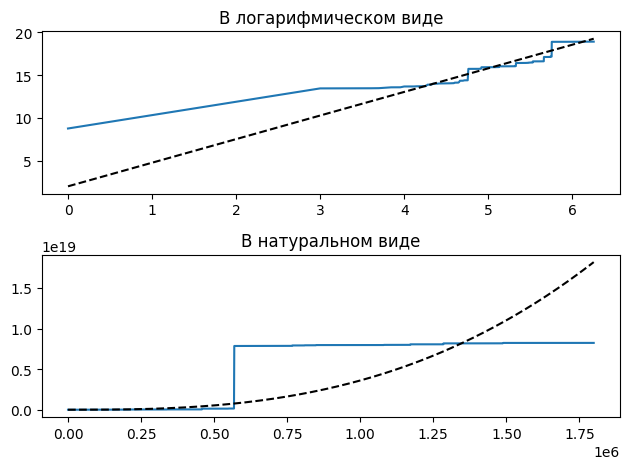

In [31]:
plt.figure()

plt.subplot(2, 1, 1) 

x = np.log10(data_calc['N'][:index])
y = np.log10(data_calc['<ΔR^2>'][:index])
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, lg_mu + nu * x,'k--', label='Аппроксимация')

plt.subplot(2, 1, 2) 
N_list = data_calc['N'][:index]
R2_list = data_calc['<ΔR^2>'][:index]
plt.title('В натуральном виде')
plt.plot(N_list, R2_list)
plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')

plt.tight_layout() 
plt.show()

In [170]:
data_first_particle = pd.read_csv('../result_new/first_particle.csv',sep=' ', index_col=False)

In [171]:
data_first_particle

,x,y
0,0.000000e+00,-2.787590e+00
1,0.000000e+00,9.074600e+00
2,0.000000e+00,4.928220e+00
3,-4.820340e+00,4.928220e+00
4,-5.070020e+00,4.928220e+00
...,...,...
1999994,3.190510e+06,-1.594740e+06
1999995,3.190510e+06,-1.594740e+06
1999996,3.190510e+06,-1.594740e+06
1999997,3.190510e+06,-1.594750e+06


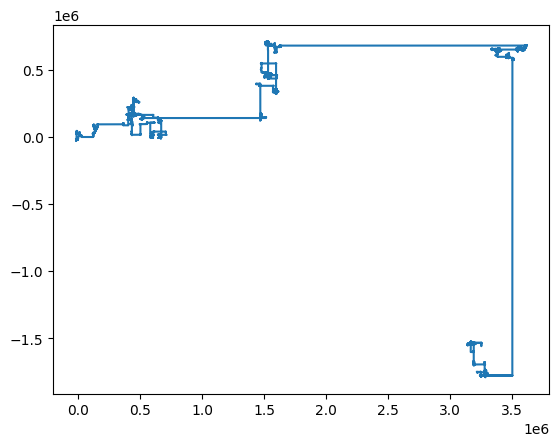

In [172]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [173]:
data_last_vals = pd.read_csv('../result_new/last_vals.csv',sep=' ', index_col=False)

In [174]:
data_last_vals

,x,y
0,3190510.0,-1594750.0
1,4460100.0,19459100.0
2,-1939400.0,-682322.0
3,1650350.0,-7355390.0
4,7269010.0,-3637330.0
...,...,...
149995,-2608940.0,-1095690.0
149996,1742090.0,1160570.0
149997,-9898000.0,3091490.0
149998,22980800.0,3153010.0


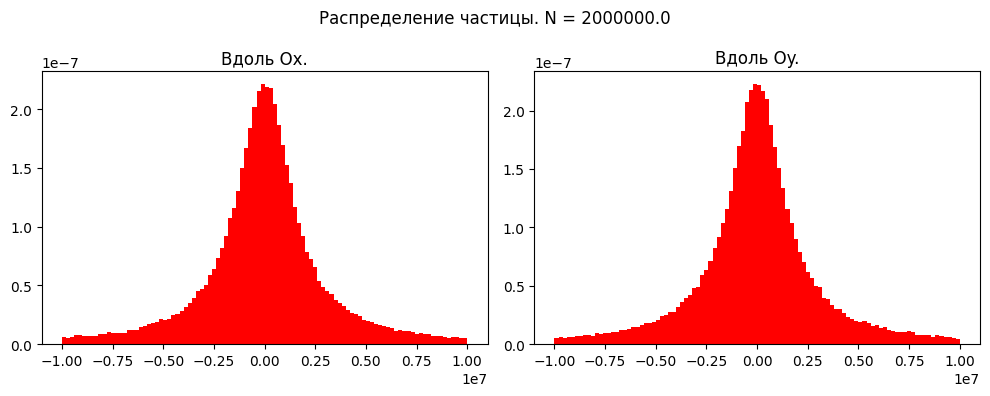

In [175]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()